In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset

tips = pd.read_csv(r"C:\Users\Shashi\Downloads\tips.csv")

In [7]:
# Importing Warning

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Checking the head of data

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Checking the Information

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
# EDA - Exploratory Data Analysis

# 1st Business Moment : Measures of Central Tendency - Mean, Median, Mode

tips.mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [9]:
tips.median()

total_bill    17.795
tip            2.900
size           2.000
dtype: float64

In [10]:
tips.mode()

,total_bill,tip,sex,smoker,day,time,size
0,13.42,2.0,Male,No,Sat,Dinner,2


In [11]:
# 2nd Business Moment : Measures of Dispersion - Variance, Standard diveation

tips.std()

total_bill    8.902412
tip           1.383638
size          0.951100
dtype: float64

In [12]:
tips.var()

total_bill    79.252939
tip            1.914455
size           0.904591
dtype: float64

In [13]:
# 3rd Business Moment : Measures of Skewness

tips.skew()

total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

In [14]:
# 4th Business Moment : Measures of Kurtisos

tips.kurt()

total_bill    1.218484
tip           3.648376
size          1.731700
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x24e0866f490>,
 'caps': [<matplotlib.lines.Line2D at 0x24e0866fa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e0866f190>],
 'medians': [<matplotlib.lines.Line2D at 0x24e0866ffd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e0867c2e0>],
 'means': []}

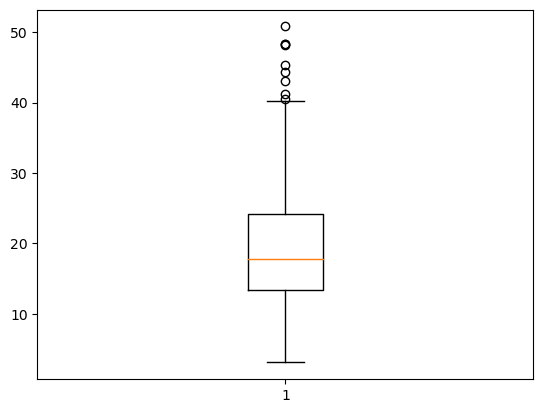

In [16]:
# Graphical Representation

plt.boxplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill'>

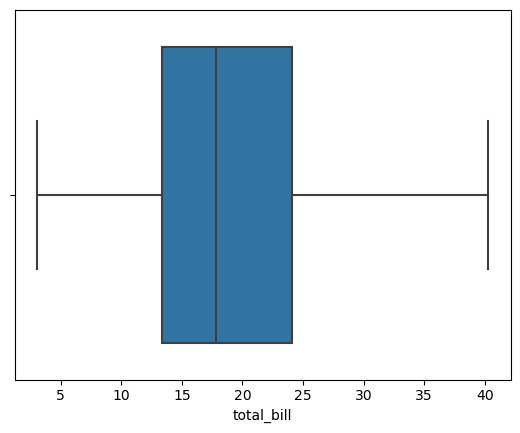

In [18]:
# To Clean outliers using Winsorization 

from feature_engine.outliers import Winsorizer

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = 'total_bill')

data_iqr = winsor_iqr.fit_transform(tips[['total_bill']])

sns.boxplot(data_iqr['total_bill'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24e08a87f40>,
 'caps': [<matplotlib.lines.Line2D at 0x24e08a96520>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e08a87c70>],
 'medians': [<matplotlib.lines.Line2D at 0x24e08a96af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e08a96dc0>],
 'means': []}

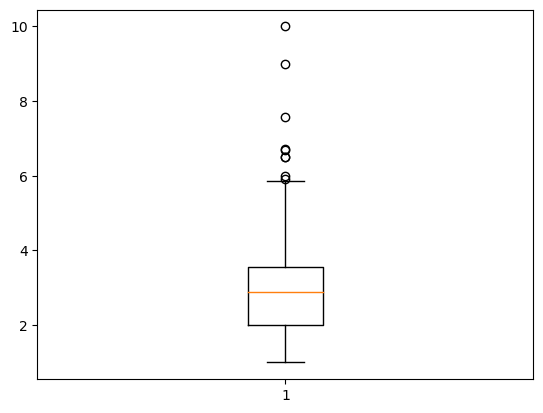

In [19]:
plt.boxplot(tips['tip'])

<AxesSubplot:xlabel='tip'>

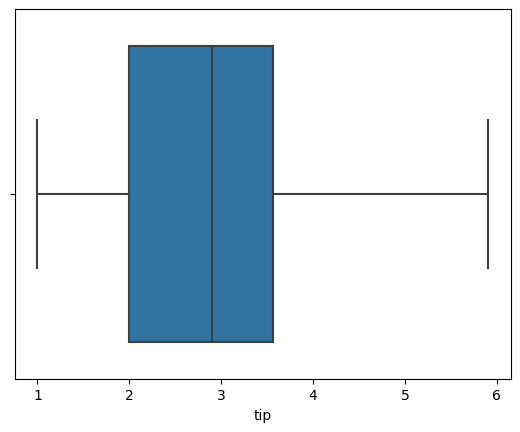

In [20]:
# To Clean outliers using Winsorization 

from feature_engine.outliers import Winsorizer

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = 'tip')

data_iqr = winsor_iqr.fit_transform(tips[['tip']])

sns.boxplot(data_iqr['tip'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24e08b4cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x24e08b59370>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e08b4cac0>],
 'medians': [<matplotlib.lines.Line2D at 0x24e08b59910>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e08b59be0>],
 'means': []}

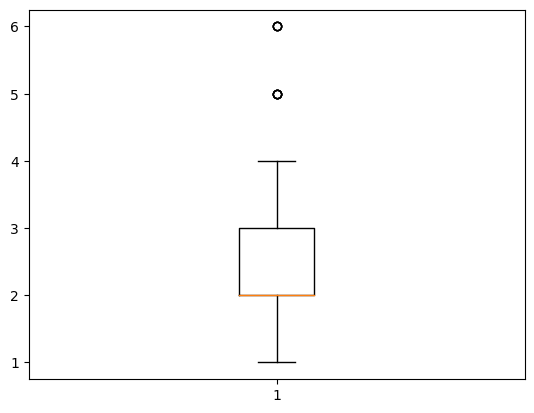

In [21]:
plt.boxplot(tips['size'])

<AxesSubplot:xlabel='size'>

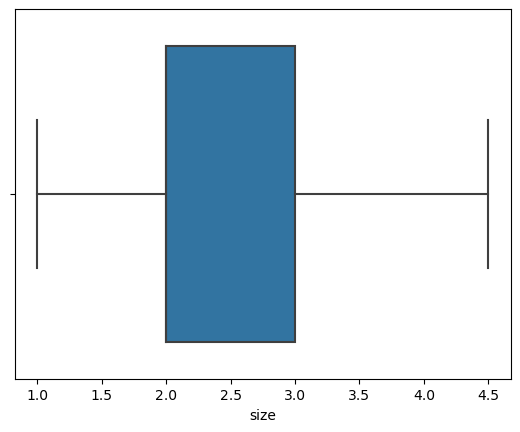

In [22]:
# To Clean outliers using Winsorization 

from feature_engine.outliers import Winsorizer

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = 'size')

data_iqr = winsor_iqr.fit_transform(tips[['size']])

sns.boxplot(data_iqr['size'])

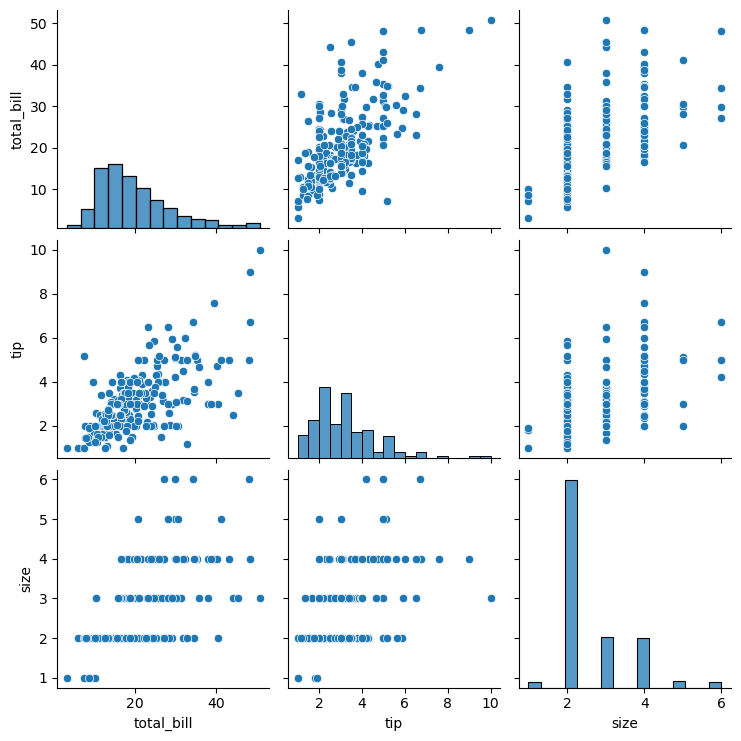

In [23]:
sns.pairplot(tips)

In [24]:
# Checking the Duplicates

tips.duplicated().sum()

1

In [25]:
tips = tips.drop_duplicates()

In [26]:
tips.duplicated().sum()

0

In [27]:
# Checking the Zero Variance

tips.var() == 0

total_bill    False
tip           False
size          False
dtype: bool

In [28]:
# Checking the null values

tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [29]:
# Dummy Values - LabelEncoder

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

tips['sex'] = enc.fit_transform(tips['sex'])
tips['smoker'] = enc.fit_transform(tips['smoker'])
tips['day'] = enc.fit_transform(tips['day'])
tips['time'] =enc.fit_transform(tips['time'])

In [30]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [31]:
# Checking the describe

tips.describe()

,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,19.813868,3.002387,0.646091,0.378601,1.736626,0.275720,2.572016
std,8.910071,1.385002,0.479168,0.486040,0.925185,0.447799,0.952356
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.380000,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.810000,2.920000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.175000,3.575000,1.000000,1.000000,2.500000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [32]:
# Standardization - Scaler min = 0, max = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [33]:
data = norm_fun(tips)
tips = pd.DataFrame(data)
tips.describe()

,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.350730,0.222487,0.646091,0.378601,0.578875,0.275720,0.314403
std,0.186637,0.153889,0.479168,0.486040,0.308395,0.447799,0.190471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215961,0.111111,0.000000,0.000000,0.333333,0.000000,0.200000
50%,0.308756,0.213333,1.000000,0.000000,0.666667,0.000000,0.200000
75%,0.442082,0.286111,1.000000,1.000000,0.833333,1.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# Checking the correlation

tips.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.674998,0.141350,0.090136,-0.039472,-0.179232,0.597589
tip,0.674998,1.000000,0.085274,0.009763,-0.007537,-0.117596,0.488400
sex,0.141350,0.085274,1.000000,0.009930,-0.071308,-0.198129,0.083248
smoker,0.090136,0.009763,0.009930,1.000000,-0.291941,-0.063911,-0.130564
day,-0.039472,-0.007537,-0.071308,-0.291941,1.000000,0.634812,0.073204
time,-0.179232,-0.117596,-0.198129,-0.063911,0.634812,1.000000,-0.100045
size,0.597589,0.488400,0.083248,-0.130564,0.073204,-0.100045,1.000000


<AxesSubplot:>

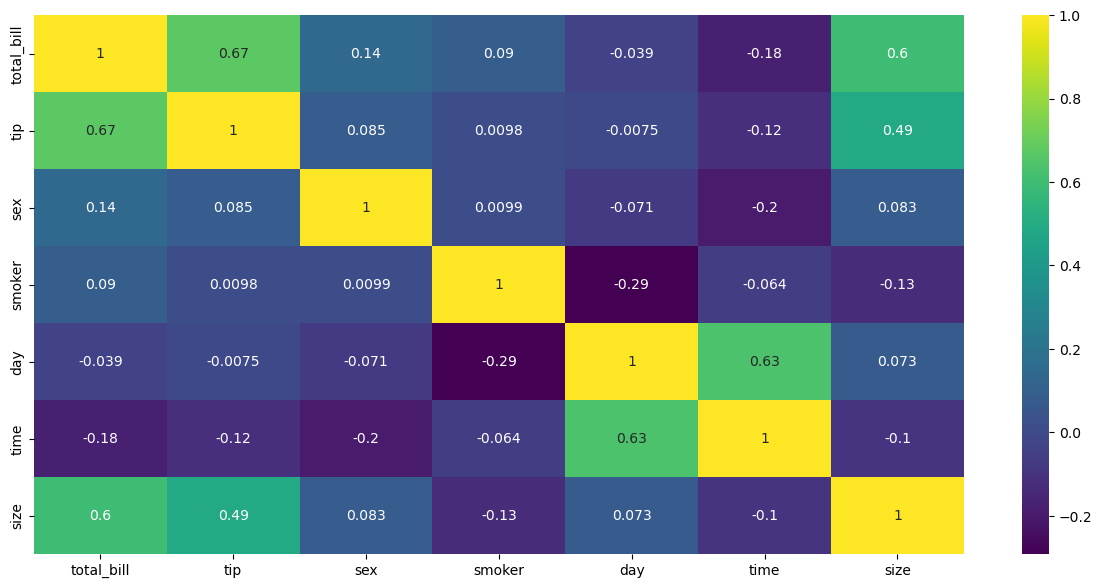

In [35]:
# Heatmap

fig = plt.figure(figsize = (15, 7))
sns.heatmap(tips.corr(), cmap = 'viridis', annot = True)

In [51]:
# Spliting the data

X = tips.drop('tip', axis = 1)
Y = tips.tip

In [52]:
# Train Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [53]:
# Continuous - Discritization

x_train = (x_train > 0).astype('int64')
y_train = (y_train > 0).astype('int64')

x_test = (x_test > 0).astype('int64')
y_test = (y_test > 0).astype('int64')

X = (X > 0).astype('int64')
Y = (Y > 0).astype('int64')

In [54]:
# Model Building

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# Checking the model score

model.score(X, Y)

0.9835390946502057

In [55]:
model.score(x_train, y_train)

0.9823529411764705

In [56]:
model.score(x_test, y_test)

0.9863013698630136

In [59]:
y_pred = model.predict(x_test)

In [60]:
# Confusion_matrix, Accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 0  1]
 [ 0 72]]


0.9863013698630136

In [61]:
y_test[:5]

110    1
150    1
37     1
75     1
109    1
Name: tip, dtype: int64

In [62]:
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Result : In this model got score with 99%, test data and predicted data is same as train data, test data, This model is right fit.  